In [1]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('academicos_historico_balanceado.csv')

In [3]:
colunas = df.columns
lista_colunas = list(df.columns)
lista_colunas.remove('chave')
lista_colunas.remove('evadido')

In [4]:
x = df[lista_colunas]
y = df['evadido']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=18)

In [5]:
model = xgb.XGBClassifier(
    n_estimators=100,          # Número de árvores que o modelo irá construir
    max_depth=10,               # Profundidade máxima de cada árvore
    learning_rate=0.5,         # Taxa de aprendizado (passo de atualização)
    subsample=0.8,             # Porcentagem de amostras usadas para cada árvore
    colsample_bytree=0.8,      # Proporção de características usadas para cada árvore
    use_label_encoder=False,    # Desativa o uso do LabelEncoder interno
    eval_metric='mlogloss'     # Métrica de avaliação utilizada (perda logarítmica multiclass)
)

In [6]:
import time
inicio = time.time()  # Tempo inicial

In [7]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [8]:
model.fit(X_train, y_train)

c:\Users\bsabd\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:17:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [9]:
model.fit(X_train, y_train)

c:\Users\bsabd\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:17:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [10]:
fim = time.time()  # Tempo final
tempo_execucao = fim - inicio

print(f"Tempo de execução: {tempo_execucao} segundos")

Tempo de execução: 0.4472932815551758 segundos


In [11]:
# Faça previsões no conjunto de teste
y_pred = model.predict(X_test)

In [12]:
# Avalie a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

Acurácia: 0.90


In [18]:

    from sklearn.metrics import f1_score
    # Calcular o F1-score
    f1 = f1_score(y_test, y_pred)  # Pode ser 'macro', 'micro' ou 'weighted'
    print(f"F1-score: {f1:.4f}")

F1-score: 0.8991


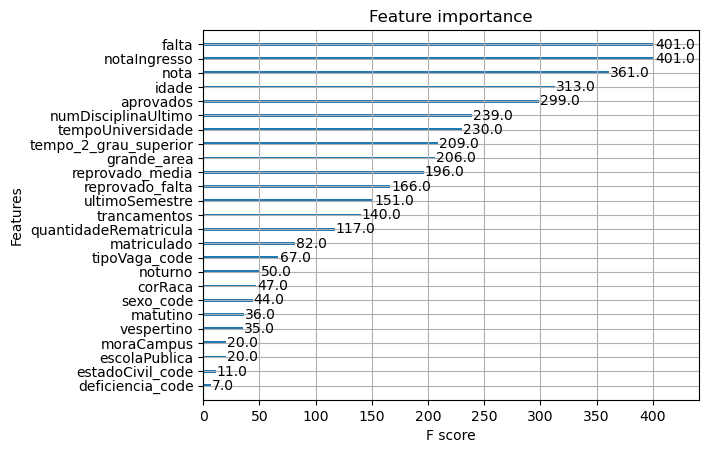

In [13]:
# Exibir a importância das características
xgb.plot_importance(model)
plt.show()

In [14]:
print('Dados de treinamento')

predicao = model.predict(X_train)

print(confusion_matrix(y_train,predicao))
print(classification_report(y_train,predicao))

Dados de treinamento
[[8254  358]
 [ 116 8523]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      8612
           1       0.96      0.99      0.97      8639

    accuracy                           0.97     17251
   macro avg       0.97      0.97      0.97     17251
weighted avg       0.97      0.97      0.97     17251



In [15]:
print('Dados de teste')

predicao = model.predict(X_test)

print(confusion_matrix(y_test,predicao))
print(classification_report(y_test,predicao))

Dados de teste
[[1880  290]
 [ 156 1987]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      2170
           1       0.87      0.93      0.90      2143

    accuracy                           0.90      4313
   macro avg       0.90      0.90      0.90      4313
weighted avg       0.90      0.90      0.90      4313

